In [262]:
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from cmath import phase


## Comparação teórica e prática dos sinais nos Pontos 1, 2 e 3. Onde p é a portadora e s é o sinal modulante

$$ p = 8cos(100000) $$
$$ s = 6cos(5000) $$

In [273]:
data1 = np.genfromtxt('static/1.csv', delimiter=',')
t1 = data1[:, 0]*10e-6
v1_medido = data1[:, 1]

a, b = 0, 200


### Ponto 1 

In [274]:
R1 = 200
R2 = 200 
R3 = 10e3
R5 = 47

<IPython.core.display.Javascript object>


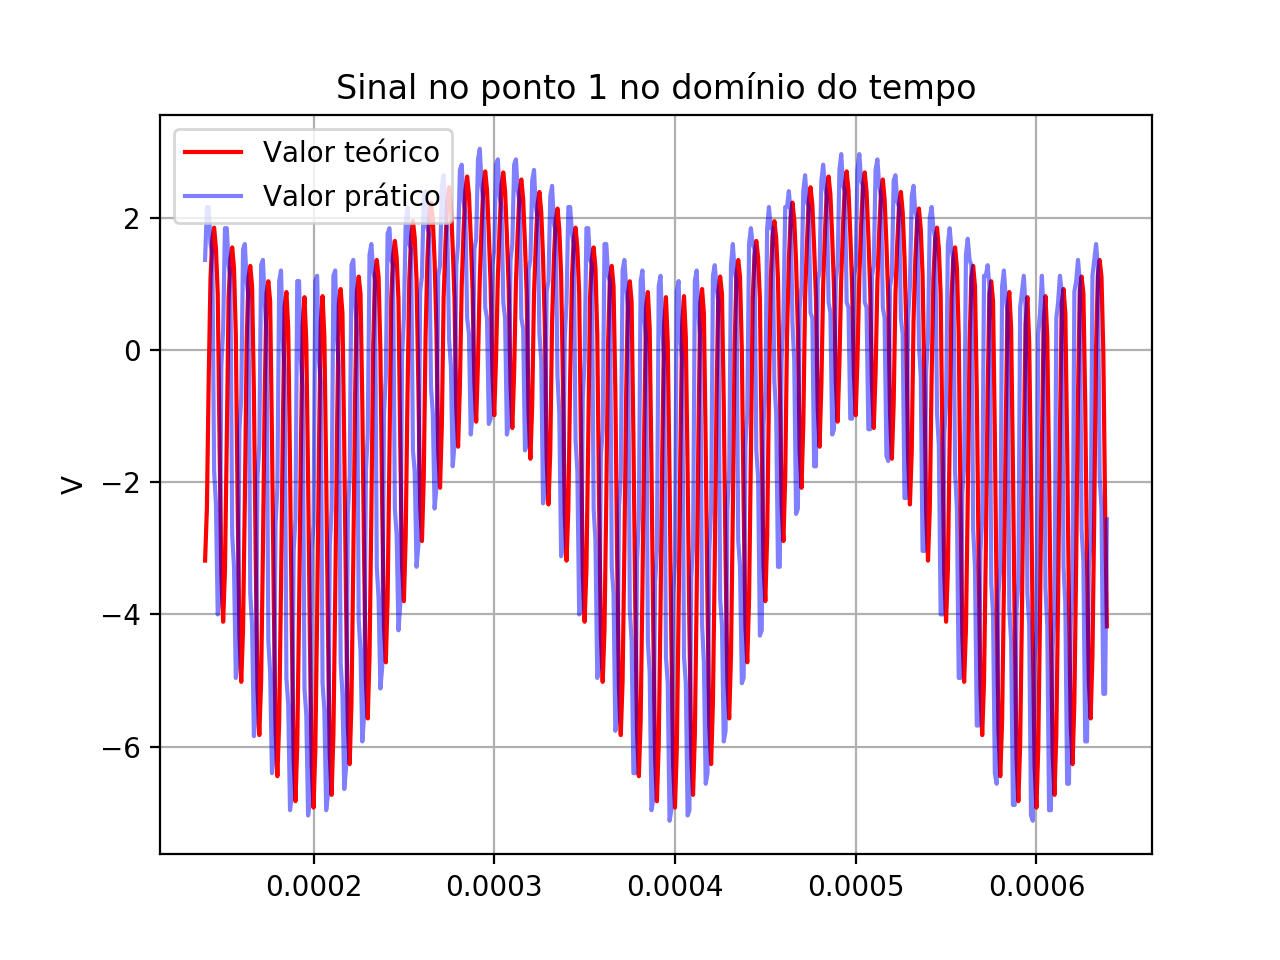

In [277]:
%matplotlib notebook


def calcular_vp1_teorico(intervalo, teta): 
    vp = 8*np.cos(2*np.pi*intervalo*100000 + teta)
    vs = 6*np.cos(2*np.pi*intervalo*5000 + teta)
    v11 = ((vs +vp)*R3)/(R1 + 2*R3) 
    v12 = (R3*R5*vp + R3*R5*vs + 0.7*R1*R3) / (R1*R5 + 2*R3*R5 + R1*R3) 

    v11[v11 > 0.7] = v12[v11 > 0.7]
    return v11

teta = (183*np.pi)/180
v1_teorico=calcular_vp1_teorico(t1, teta)
a, b = 0, 500
plt.plot(t1[a:b],v1_teorico[a:b],'r', label="Valor teórico")
plt.plot(t1[a:b],v1_medido[a:b], 'b', alpha=0.5, label="Valor prático")
plt.title("Sinal no ponto 1 no domínio do tempo")
plt.ylabel('V')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


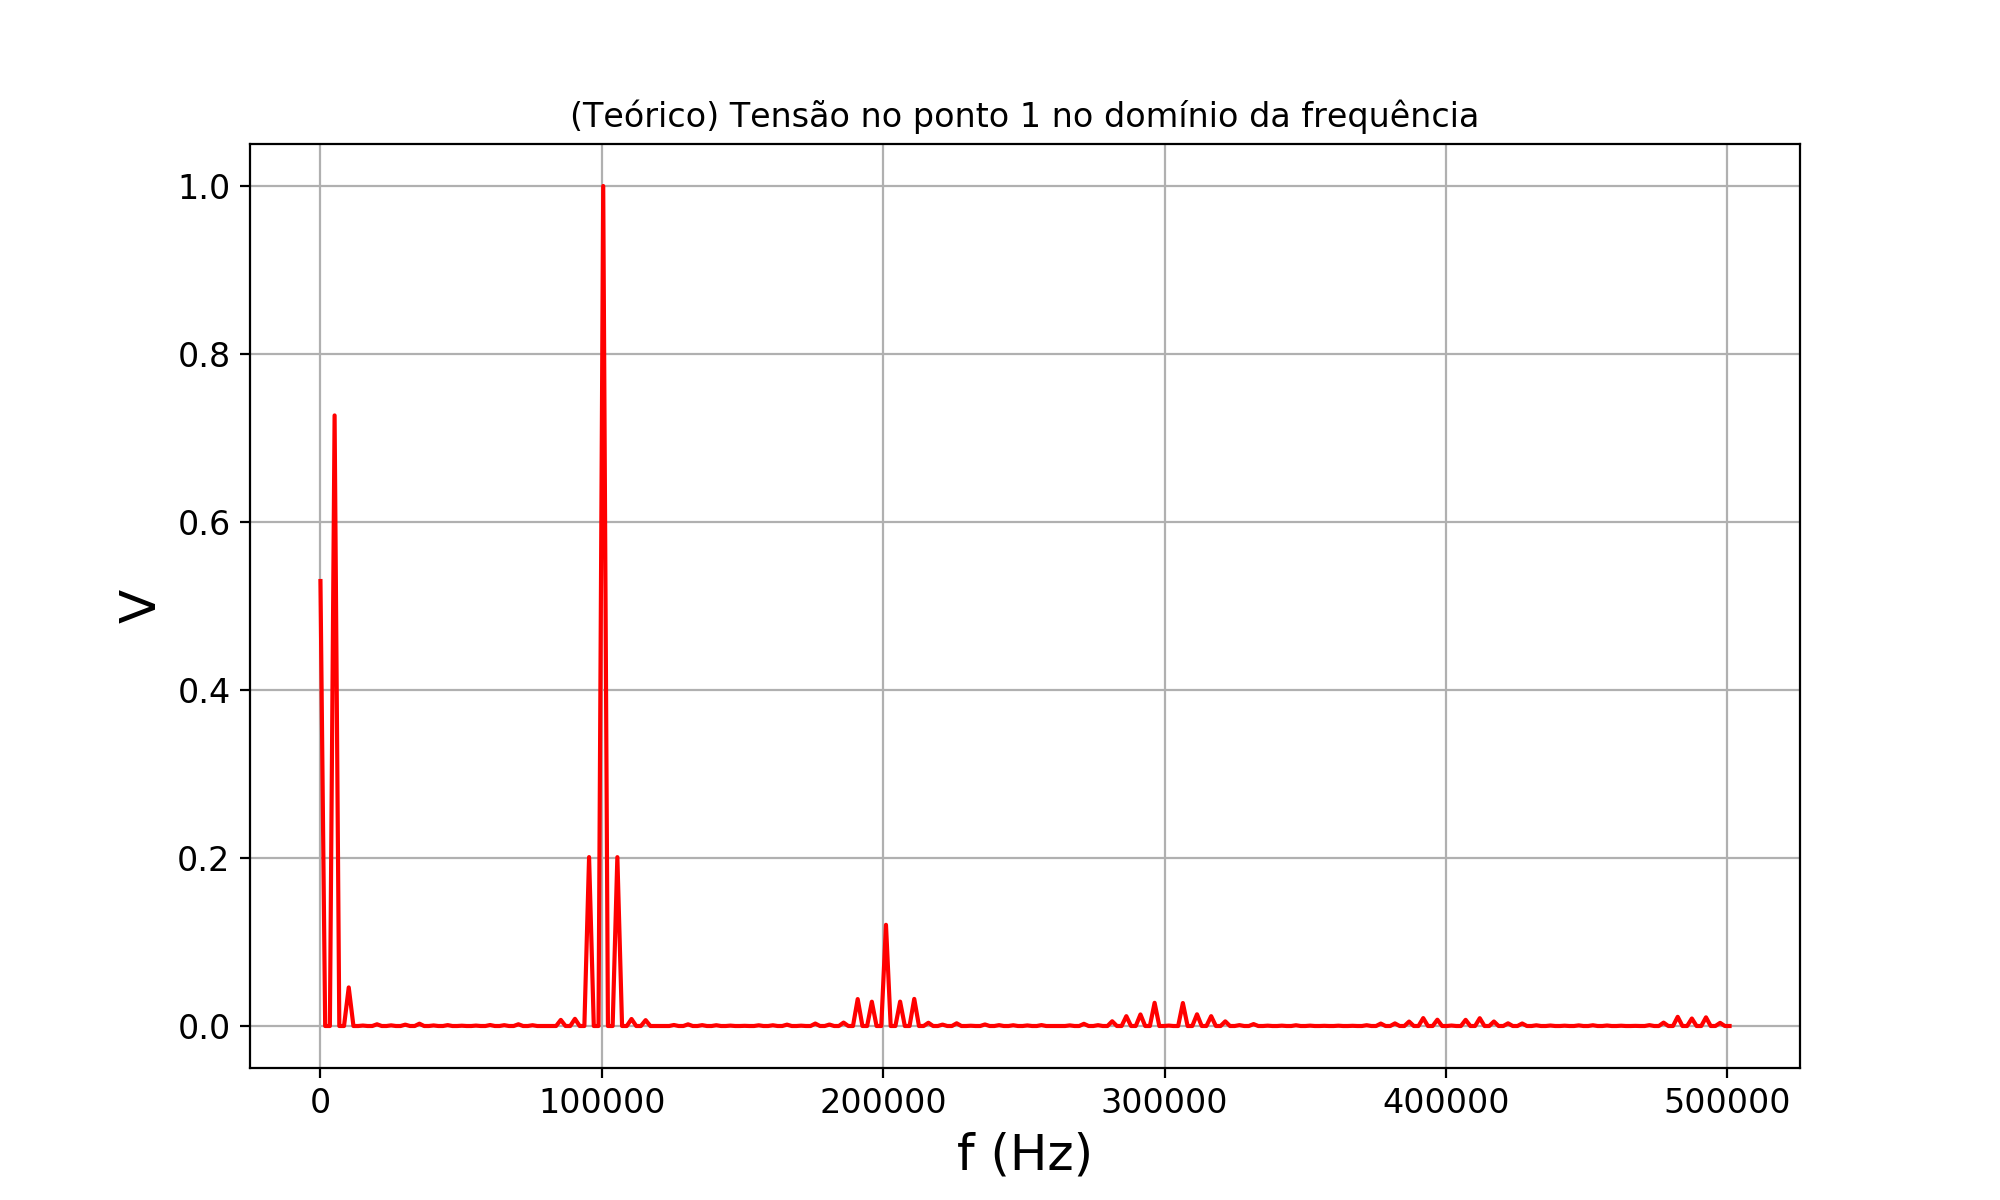

In [287]:
fft_v1_teorico = np.fft.fft(v1_teorico)

T = (t1[-1] - t1[0]) / len(t1)

f_v1_teorico = np.linspace(0, 1.0/(2*T), len(fft_v1_teorico) // 2)

ff_v1_teorico = abs((2/len(fft_v1_teorico)) * fft_vp1[:len(fft_v1_teorico)//2])
ff_v1_teorico = ff_v1_teorico / np.max(ff_v1_teorico)

plt.figure(figsize=(10,6))
plt.title("(Teórico) Tensão no ponto 1 no domínio da frequência")
plt.plot(f_v1_teorico, ff_v1_teorico, 'r', label="Teórico")
plt.grid(True, which="both")
plt.xlabel('f (Hz)', fontsize=18)
plt.ylabel('V', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)


<IPython.core.display.Javascript object>


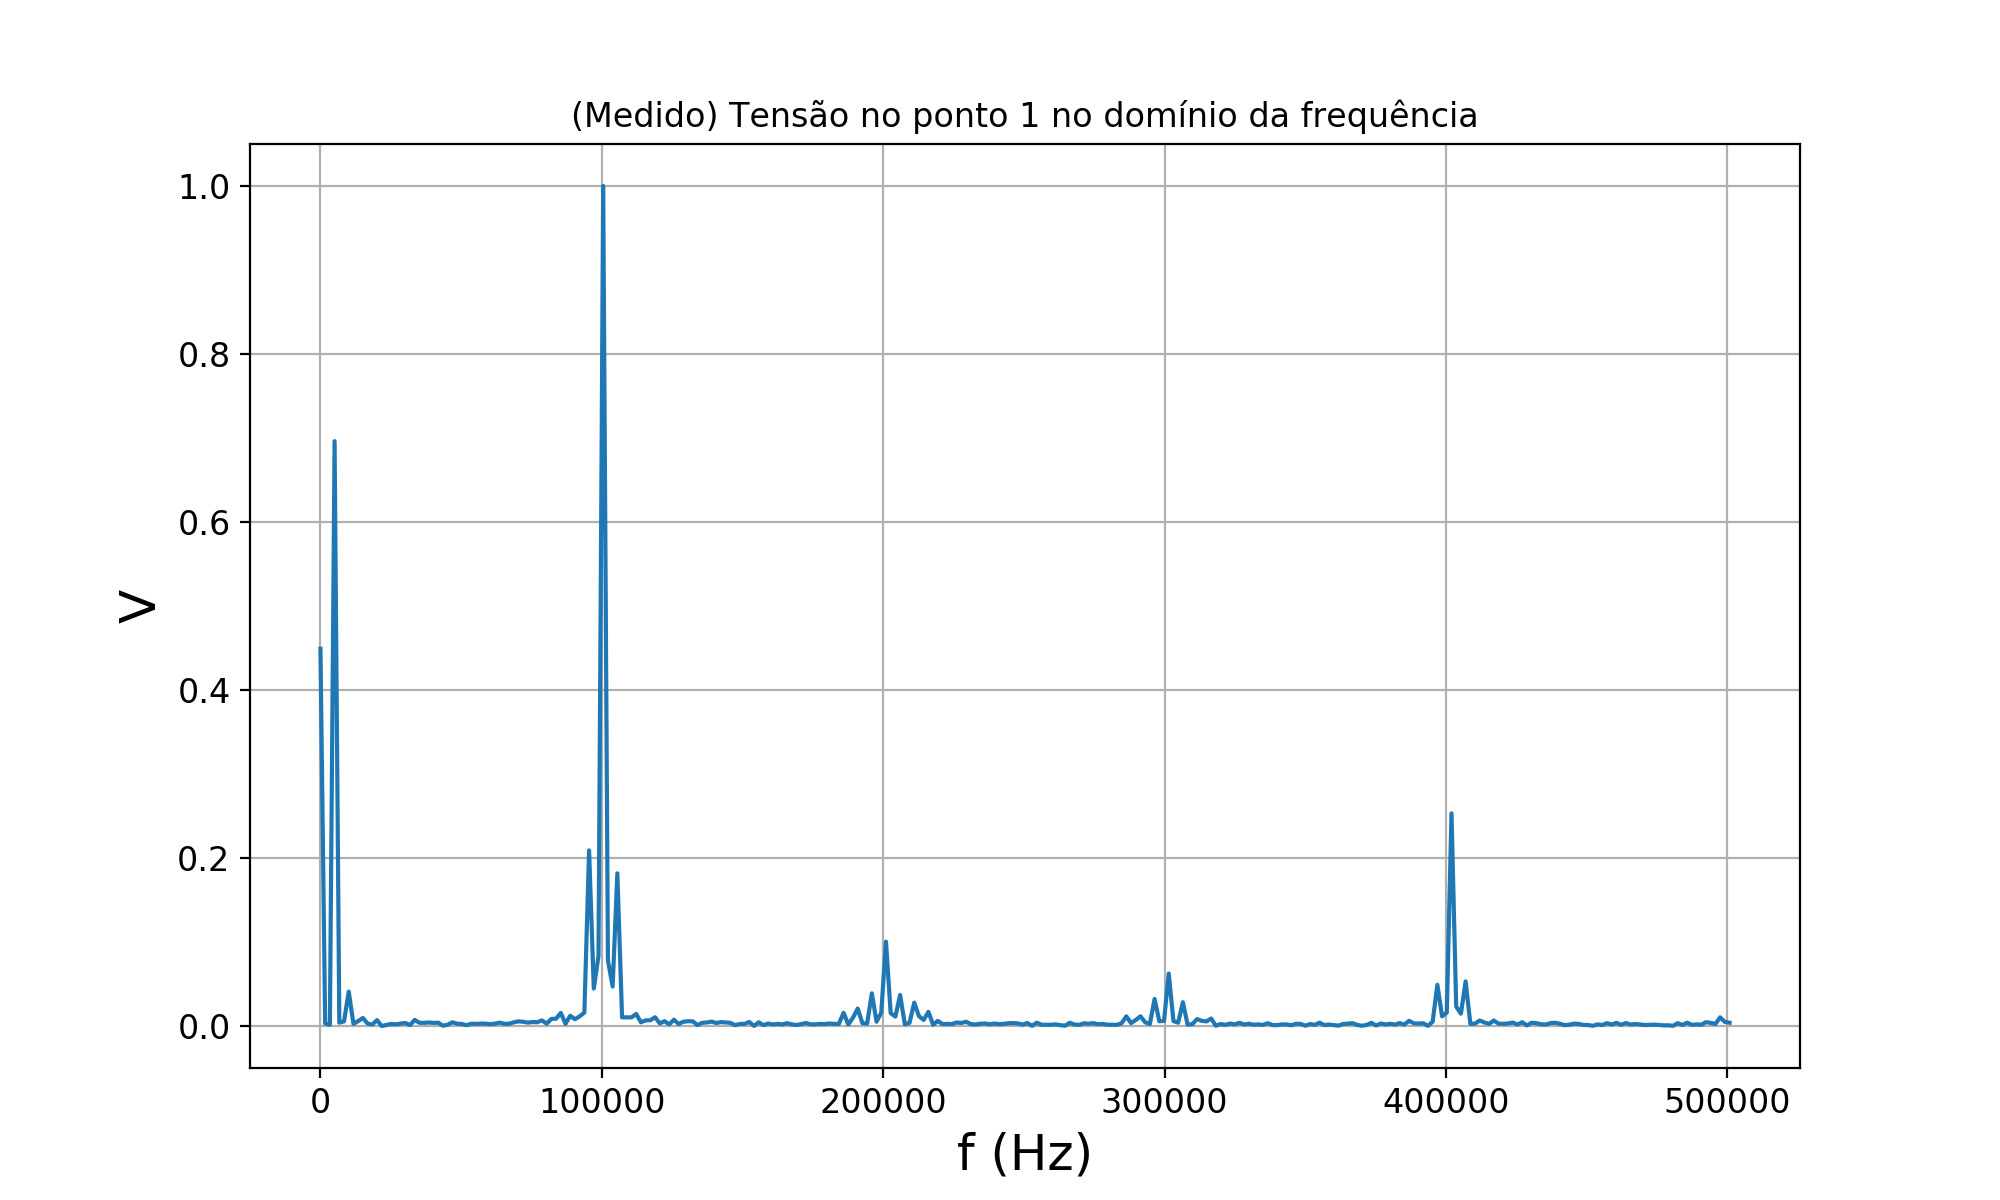

In [284]:
fft_v1_medido = np.fft.fft(v1_medido)

T = (t1[-1] - t1[0]) / len(t1)

f_v1_medido = np.linspace(0, 1.0/(2*T), len(fft_v1_medido) // 2)

ff_v1_medido = abs((2/len(fft_v1_medido)) * fft_v1_medido[:len(fft_v1_medido)//2])
ff_v1_medido = ff_v1_medido/ np.max(ff_v1_medido)

plt.figure(figsize=(10,6))
plt.title("(Medido) Tensão no ponto 1 no domínio da frequência")
plt.plot(f_v1_medido, ff_v1_medido, label="Medido")
plt.grid(True, which="both")
plt.xlabel('f (Hz)', fontsize=18)
plt.ylabel('V', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
